In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns

In [3]:
# getting data
x_train = pd.read_csv('./HW2 Data/p2/x1.csv')
y_train = pd.read_csv('./HW2 Data/p2/c1.csv')

x_test = pd.read_csv('./HW2 Data/p2/x2.csv')
y_test = pd.read_csv('./HW2 Data/p2/c2.csv')

In [4]:
# train model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

# predict
y_pred = knn.predict(x_test)

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9711


Text(0.5, 1.0, 'Confusion Matrix for 1-Nearest Neighbor Food Classification')

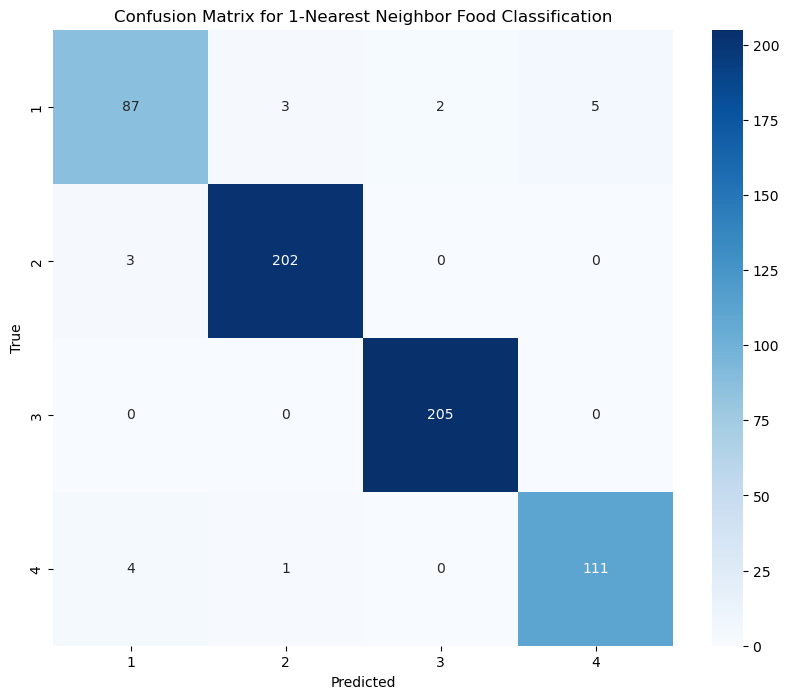

In [5]:
# plot
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(np.concatenate((y_train, y_test)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for 1-Nearest Neighbor Food Classification')

# we got 97% accuract which is quite good.
# along the diagonal we can see the correct predictions, and off diagonal are the incorrect predictions
# we can see that class 1 is the class that gets misclassified the most
# this might be because of the same use of ingredients in other classes such as class 4 which is baked products.
# another trend we can see is that class 3 is misclassifed only 2 times, which is pretty good because 
# class 3 is protein and disticntly different from the other classes. 

In [6]:
# quadratic classifier

# getting data
x_train = pd.read_csv('./HW2 Data/p2/x1.csv')
y_train = pd.read_csv('./HW2 Data/p2/c1.csv')

x_test = pd.read_csv('./HW2 Data/p2/x2.csv')
y_test = pd.read_csv('./HW2 Data/p2/c2.csv')

In [7]:
# train and test model
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(x_train, y_train)
y_pred_qda = qda.predict(x_test)
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"Regular QDA Accuracy: {accuracy_qda:.4f}")

Regular QDA Accuracy: 0.9679


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Confusion Matrix for Quadratic Classifier Food Classification')

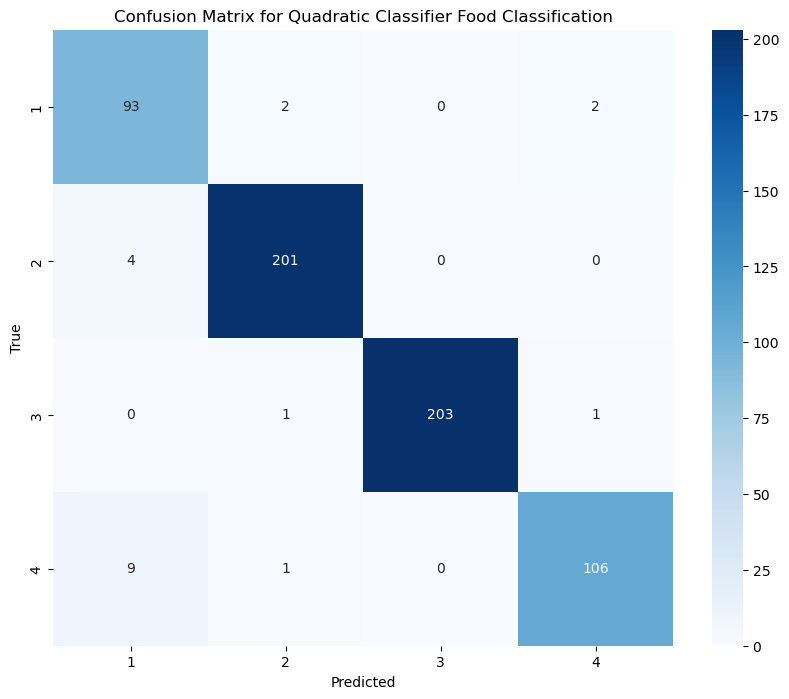

In [8]:
# plot 
cm = confusion_matrix(y_test, y_pred_qda)
class_names = np.unique(np.concatenate((y_train, y_test)))

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Quadratic Classifier Food Classification')

# assuming that features are uncorrelated is not valid for this dataset.add
# this is because many features in food items are correlated.
# for example, a food with lots of fats will likely also be high in calories, so it is unreasonable to assume a diagonal covariance matrix.

# the accuracy acheived by the quadratic classifier is 96.8% which is slightly worse than the 1-KNN.
# the quadratic classifier is better at classifying class 1, worse at classifying class 4, and around the same performance for classes 2 and 3.

In [9]:
# forward feature selection
x_train = pd.read_csv('./HW2 Data/p2/x1.csv')
y_train = pd.read_csv('./HW2 Data/p2/c1.csv')

x_test = pd.read_csv('./HW2 Data/p2/x2.csv')
y_test = pd.read_csv('./HW2 Data/p2/c2.csv')

In [10]:
# Create 1-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sfs = SequentialFeatureSelector(
    knn,
    n_features_to_select=5,  # Select 5 best features
    direction='forward',
    scoring='accuracy',
    cv=cv,
)

sfs.fit(x_test, y_test['labels'].values)
selected_indices = list(sfs.get_support(indices=True))
selected_features = [f"Feature_{i}" for i in selected_indices]

# Print selected features
print("\nSelected features:")
for i, feature_idx in enumerate(selected_indices):
    print(f"{i+1}. Feature_{feature_idx}")

# yes, the results picked make sense. 
# the features selected are the ones that are most useful for the classifier to make predictions.
# feature number 3 is protein and that is a feature that easily separates class 3 from all the other classes.
# feature number 5 is also a good feature because the only class that would have ash would be baked products, which makes is a good feature to separate class 4
# feature number 9 is calcium which can be used to separate class 2. this is because some vegetables have high calcium content.
# compared to the other classes.
# feature 18 
# feature number 25 is also used to separte class 2 from other classes because vegetables have a high content of folate.


Selected features:
1. Feature_3
2. Feature_5
3. Feature_9
4. Feature_18
5. Feature_25


In [11]:
# Part D
# get training data
x_train = pd.read_csv('./HW2 Data/p2/x2.csv')
y_train = pd.read_csv('./HW2 Data/p2/c2.csv')

# get test data --> this is where they will put their own test file
x_test = pd.read_csv('./HW2 Data/p2/x3.csv')
# y_test = pd.read_csv('./HW2 Data/p2/c3.csv')

In [12]:
# train model
knn = KNeighborsClassifier(n_neighbors=1)
y_train_values = y_train['labels'].values
knn.fit(x_train, y_train_values)

KNeighborsClassifier(n_neighbors=1)

In [14]:
# predict using test data
y_pred = knn.predict(x_test)

# Save predictions to a CSV file
predictions_df = pd.DataFrame({'labels': y_pred})
predictions_df.to_csv('c3_pred.csv', index=False)
print(f"Predictions saved to c3_pred.csv")


Predictions saved to c3_pred.csv


In [15]:
# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")